<a href="https://colab.research.google.com/github/bbucalonserra/data_analysis_and_best_practices/blob/main/machine_learning_and_analytics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Machine Learning and Analytics

## Professors Tatiana Escovedo and Hugo Villamizar

## 1 Problem Definition

Today, one of the major problems faced by delivery companies is **DELAYED DELIVERIES**. In light of this, the idea emerged to create a predictive analysis using machine learning models to anticipate whether a delivery will be delayed or not based on the data collected from orders. There are no solid premises regarding the reasons for delays, only that, given that the datasets used are in a snowflake schema, a filter was applied to **analyze only motorcyclists, always in the food segment, with delivery status always marked as delivered and order status as finalized.**

The complete snowflake schema can be seen in the image below.



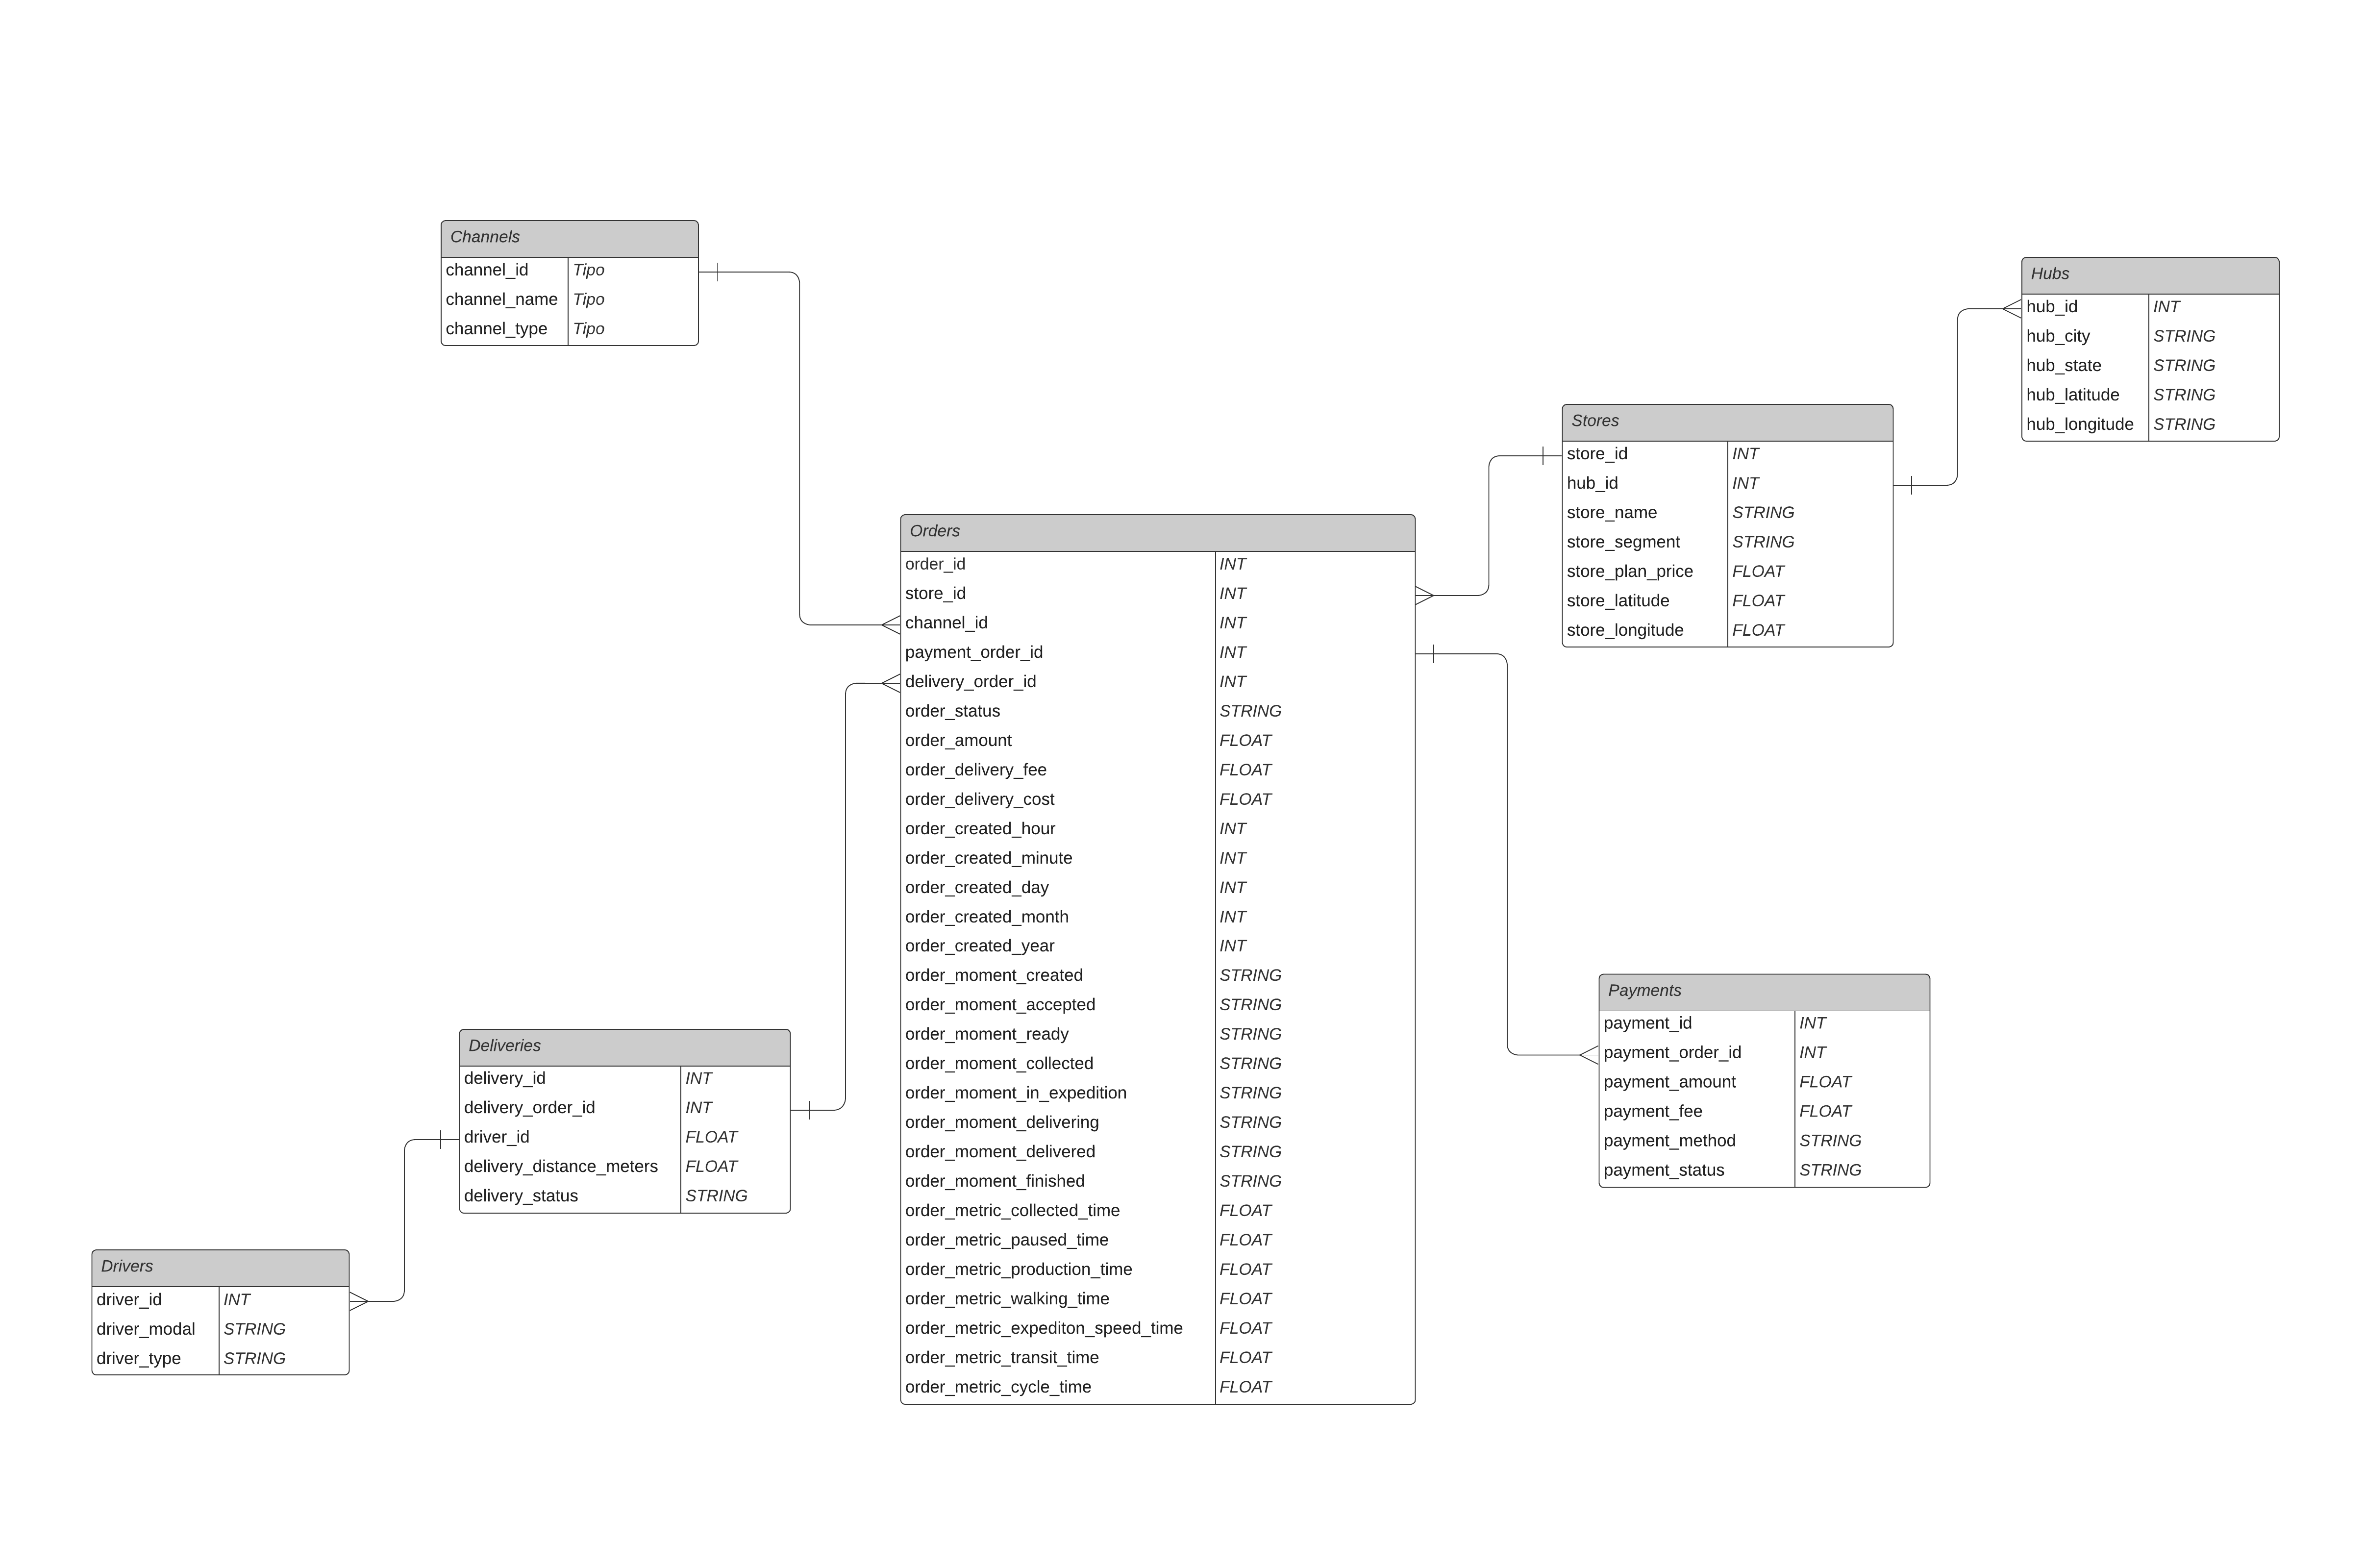

**NOTE:** The schema was created using the [Lucid App](https://www.lucidchart.com/pages) application.

Below you can check what each attribute represents.


| Dataset       | Column                        | Description                                            | Data Type |
|---------------|-------------------------------|--------------------------------------------------------|-----------|
| channels_df   | channel_id                    | Unique identifier for each channel                     | INT       |
|               | channel_name                  | Name of the channel                                    | STRING    |
|               | channel_type                  | Type of the channel (e.g., online, retail)            | STRING    |
| deliveries_df| delivery_id                   | Unique identifier for each delivery                    | INT       |
|               | delivery_order_id             | Identifier for the order associated with the delivery  | INT       |
|               | driver_id                     | Identifier for the driver assigned to the delivery     | FLOAT     |
|               | delivery_distance_meters      | Distance covered in meters for the delivery            | FLOAT     |
|               | delivery_status               | Status of the delivery (e.g., pending, delivered)     | STRING    |
| drivers_df    | driver_id                     | Unique identifier for each driver                      | INT       |
|               | driver_modal                  | Model of the driver's vehicle                          | STRING    |
|               | driver_type                   | Type of driver (e.g., full-time, part-time)           | STRING    |
| hubs_df       | hub_id                        | Unique identifier for each hub                         | INT       |
|               | hub_name                      | Name of the hub                                        | STRING    |
|               | hub_city                      | City where the hub is located                           | STRING    |
|               | hub_state                     | State where the hub is located                          | STRING    |
|               | hub_latitude                  | Latitude coordinate of the hub                          | STRING    |
|               | hub_longitude                 | Longitude coordinate of the hub                         | STRING    |
| orders_df     | order_id                      | Unique identifier for each order                       | INT       |
|               | store_id                      | Identifier for the store associated with the order      | INT       |
|               | channel_id                    | Identifier for the channel associated with the order    | INT       |
|               | payment_order_id              | Identifier for the payment associated with the order    | INT       |
|               | order_status                  | Status of the order (e.g., pending, delivered)         | STRING    |
|               | order_amount                  | Amount of the order                                    | FLOAT     |
|               | order_delivery_fee            | Fee associated with the delivery of the order          | FLOAT     |
|               | order_delivery_cost           | Cost associated with the delivery of the order         | FLOAT     |
|               | order_created_hour            | Hour when the order was created                        | INT       |
|               | order_created_minute          | Minute when the order was created                      | INT       |
|               | order_created_day             | Day when the order was created                         | INT       |
|               | order_created_month           | Month when the order was created                       | INT       |
|               | order_created_year            | Year when the order was created                        | INT       |
|               | order_moment_created          | Moment when the order was created                      | STRING    |
|               | order_moment_accepted         | Moment when the order was accepted                     | STRING    |
|               | order_moment_ready            | Moment when the order was ready for delivery           | STRING    |
|               | order_moment_collected        | Moment when the order was collected by the driver      | STRING    |
|               | order_moment_in_expedition    | Moment when the order was in expedition                | STRING    |
|               | order_moment_delivering       | Moment when the order was being delivered              | STRING    |
|               | order_moment_delivered        | Moment when the order was delivered                    | STRING    |
|               | order_moment_finished         | Moment when the order was finished                     | STRING    |
|               | order_metric_collected_time  | Time taken to collect the order                        | FLOAT     |
|               | order_metric_paused_time     | Time the order was paused                              | FLOAT     |
|               | order_metric_production_time | Time taken for production                              | FLOAT     |
|               | order_metric_walking_time    | Time taken for walking                                 | FLOAT     |
|               | order_metric_expediton_speed_time | Time taken for expedition speed                  | FLOAT     |
|               | order_metric_transit_time    | Time taken for transit                                 | FLOAT     |
|               | order_metric_cycle_time      | Time taken for the entire cycle of the order           | FLOAT     |
| payments_df   | payment_id                    | Unique identifier for each payment                     | INT       |
|               | payment_order_id              | Identifier for the order associated with the payment    | INT       |
|               | payment_amount                | Amount of the payment                                  | FLOAT     |
|               | payment_fee                   | Fee associated with the payment                        | FLOAT     |
|               | payment_method                | Method of payment (e.g., credit card, cash)            | STRING    |
|               | payment_status                | Status of the payment (e.g., completed, pending)       | STRING    |
| stores_df     | store_id                      | Unique identifier for each store                       | INT       |
|               | hub_id                        | Identifier for the hub associated with the store       | INT       |
|               | store_name                    | Name of the store                                      | STRING    |
|               | store_segment                 | Segment/category of the store                          | STRING    |
|               | store_plan_price              | Price of the store's plan                              | FLOAT     |
|               | store_latitude                | Latitude coordinate of the store                        | FLOAT     |
|               | store_longitude               | Longitude coordinate of the store                       | FLOAT     |


### 1.1 Problem to be Solved
Minimize the frequency of deliveries experiencing delays to improve operational efficiency and customer satisfaction by implementing strategies aimed at improving delivery timelines and optimizing logistical processes.

### 1.2 Objectives
Offer an effective machine learning solution to forecast delivery delays, empowering businesses to anticipate and address potential setbacks ahead of time, leading to better operations and improved customer satisfaction. Summerizing, since the main output we should collect in this project is a boolean to check if a delivery will be or will not be on time, we'll use **SUPERVISED problem of CLASSIFICTION**.



## 2 Data Preparation
**The main goal of the data preparation is to perform operations of data prepatation.** This part in a machine learning (ML) project involves cleaning, transforming, and organizing raw data to make it suitable for analysis and model training. This process includes tasks such as removing outliers, handling missing values, encoding categorical variables, scaling features and splitting the data into training and testing sets.

### 2.1 Data Preprocessing
Data preprocessing involves cleaning, transforming, and organizing raw data into a format suitable for analysis or modeling. **Since we already know that this is a supervised classification problem, the data pre prossessing will be performed considering the algorithms used in classification**.

#### 2.1.1 Imports
As a good practice for programming in Python, all necessary libraries will be imported in a single notebook.

In [250]:
# Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import chardet
import requests
import seaborn as sns
import missingno as ms
import warnings
warnings.filterwarnings("ignore")
from sklearn import *
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
from sklearn.feature_selection import RFE
from sklearn.feature_selection import f_regression
from sklearn.feature_selection import chi2
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import learning_curve
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_validate
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import recall_score
from sklearn.metrics import make_scorer
from sklearn.metrics import mean_squared_error
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression

In [251]:
# Configuring Pandas to show all columns and rows
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

#### 2.1.2 Data Collection

In [252]:
# Creating variables for the table
channels = 'https://raw.githubusercontent.com/bbucalonserra/machine_learning_and_analytics/main/Dataset/channels.csv'
deliveries = 'https://raw.githubusercontent.com/bbucalonserra/machine_learning_and_analytics/main/Dataset/deliveries.csv'
drivers = 'https://raw.githubusercontent.com/bbucalonserra/machine_learning_and_analytics/main/Dataset/drivers.csv'
hubs = 'https://raw.githubusercontent.com/bbucalonserra/machine_learning_and_analytics/main/Dataset/hubs.csv'
orders = 'https://raw.githubusercontent.com/bbucalonserra/machine_learning_and_analytics/main/Dataset/orders.csv'
payments = 'https://raw.githubusercontent.com/bbucalonserra/machine_learning_and_analytics/main/Dataset/payments.csv'
stores = 'https://raw.githubusercontent.com/bbucalonserra/machine_learning_and_analytics/main/Dataset/stores.csv'

In [253]:
# Creating datasets for each table
channels_df = pd.read_csv(channels, delimiter = ',')
deliveries_df = pd.read_csv(deliveries, delimiter = ',')
drivers_df = pd.read_csv(drivers, delimiter = ',')
hubs_df = pd.read_csv (hubs, delimiter = ';')
orders_df = pd.read_csv (orders, delimiter = ',')
payments_df = pd.read_csv(payments, delimiter = ',')
stores_df = pd.read_csv(stores, delimiter = ',', encoding = 'ISO-8859-1')

#### 2.1.3 Data Structure


##### 2.1.3.1 Dimensions
Check the dimensions of each dataset.

In [254]:
datasets = [channels_df, deliveries_df, drivers_df, hubs_df, orders_df, payments_df, stores_df]
datasets_names = ['channels_df', 'deliveries_df', 'drivers_df', 'hubs_df', 'orders_df', 'payments_df', 'stores_df']

for i, table in enumerate(datasets, start = 0):
    print(f"{datasets_names[i]} - Shape: {table.shape}")

channels_df - Shape: (40, 3)
deliveries_df - Shape: (378843, 5)
drivers_df - Shape: (4824, 3)
hubs_df - Shape: (32, 6)
orders_df - Shape: (368999, 29)
payments_df - Shape: (400834, 6)
stores_df - Shape: (951, 7)


##### 2.1.3.2 Data Types
Check the data types of each dataset.

In [255]:
for i, table in enumerate(datasets, start=0):
    print(f"Dataset {i+1}: {datasets_names[i]}")
    print(table.dtypes)
    print()

Dataset 1: channels_df
channel_id       int64
channel_name    object
channel_type    object
dtype: object

Dataset 2: deliveries_df
delivery_id                   int64
delivery_order_id             int64
driver_id                   float64
delivery_distance_meters    float64
delivery_status              object
dtype: object

Dataset 3: drivers_df
driver_id        int64
driver_modal    object
driver_type     object
dtype: object

Dataset 4: hubs_df
hub_id            int64
hub_name         object
hub_city         object
hub_state        object
hub_latitude     object
hub_longitude    object
dtype: object

Dataset 5: orders_df
order_id                               int64
store_id                               int64
channel_id                             int64
payment_order_id                       int64
delivery_order_id                      int64
order_status                          object
order_amount                         float64
order_delivery_fee                   float64
order_de

In [256]:
tem_duplicatas = payments_df['payment_order_id'].duplicated().any()

if tem_duplicatas:
    print("Possui valores duplicados.")
else:
    print("Possui apenas valores únicos.")

Possui valores duplicados.


#### 2.1.4 Dataset Concatenation
Here we'll collect all datasets we need and concatenate into one. We must join:
  * orders_df with deliveries_df and than deliveries_df with drivers_df **to collect the driver_modal**
  * orders_df with channels_df **to collect the channel_type**
  * orders_df with stores_df than hubs_df **to collect the hub_state**
  * orders_df with payments_df **to collect payment_status**

In [257]:
# Joinning orders_df with deliveries_df on delivery_order_id
orders_deliveries_df = pd.merge(orders_df, deliveries_df, on = 'delivery_order_id')

# Check new shape
orders_deliveries_df.shape

(378843, 33)

Since there are more instances comparing to **orders_df**, it may suggests that there are duplicated delivery_order_id. In other words, this means that an order can have multiple deliveries associated with it. This situation is common in e-commerce or logistics systems, where a single order can be delivered in multiple shipments, such as when the items in an order are shipped separately.

In [258]:
# Joinning orders_deliveries_df with payments_df on payment_order_id
orders_deliveries_payments_df = pd.merge(orders_deliveries_df, payments_df, on = 'payment_order_id')

# Check new shape
orders_deliveries_payments_df.shape

(419687, 38)

Since there are more instances after joinning payments_df with orders_deliveries_df, it indicates that multiple payments may be associated with a single order or cases where an order is partially paid or through multiple transactions, resulting in the same order ID being associated with different payments

In [259]:
# Joinning orders_deliveries_payments_df with channels_df on channel_id
orders_deliveries_payments_channels_df = pd.merge(orders_deliveries_payments_df, channels_df, on = 'channel_id')

# Check new shape
orders_deliveries_payments_channels_df.shape

(419687, 40)

In [260]:
# Joinning orders_deliveries_df with drivers_df on driver_id
orders_deliveries_payments_channels_drivers_df = pd.merge(orders_deliveries_payments_channels_df, drivers_df, on = 'driver_id')

# Check new shape
orders_deliveries_payments_channels_drivers_df.shape

(410863, 42)

Since there are less instances above, **it may suggest that the dataset deliveries_df has *NaNs* in the driver_id or other driver_id not present on drivers_df.**

In [261]:
# Joinning drivers_deliveries_df with stores_df on store_id
orders_deliveries_payments_channels_drivers_stores_df = pd.merge(orders_deliveries_payments_channels_drivers_df, stores_df, on = 'store_id')

# Check new shape
orders_deliveries_payments_channels_drivers_stores_df.shape

(410863, 48)

Since the number of instances is the same as the previous dataset, there is no missing data.

In [262]:
# Joinning order_deliveries_drivers_stores_df with hubs_df on hub_id
orders_df = pd.merge(orders_deliveries_payments_channels_drivers_stores_df, hubs_df, on = 'hub_id')

# Check new shape
orders_df.shape

(410863, 53)

Since the number of instances is the same as the previous dataset, there is no missing data.

#### 2.1.5 Applying Business Rules
For this project, since there is no *is_delayed* column in any of the datasets, we're going to create a new boolean column that shows if an order was or wasn't delayed. For this, we'll consider the average time of deliver by state, if the delivery time is higher than the average, the order is delayed. For this number be more realistic, it is going to be considered only motoboy (driver_modal = motoboy in drivers_df) and food segment stores (store_segment = food in stored_df), because both columns could generate high outliers for our machine learning models. Since the average time of deliveries could change from state to state, we'll also segregate by state. In addition, the columns with informations that occuered **after** the order accepted will not be considered (because, since the project aims to predict if an order is going to be delayed or not, we only will have the information after order accepted).

**NOTE: We're going to apply the business rules before the null treatment because, with this, we'll have less attributes to deal with, saving time and computatinal resources.**

##### 2.1.5.1 Adding Column is_delayed

In [263]:
# Creating a variable for the median time
average_order_metric_cycle_time_per_state = orders_df.groupby('hub_state')['order_metric_cycle_time'].transform('mean')

# Since the average_order_metric_cycle_time_per_state is a series, create a new column in the orders_df using map function
orders_df['average_order_metric_cycle_time'] = average_order_metric_cycle_time_per_state.round(2)

# Creating a new column with the values
orders_df['is_delivery_delayed'] = np.where(orders_df['order_metric_cycle_time'] < orders_df['average_order_metric_cycle_time'], 0, 1)

##### 2.1.5.2 Feature Selection (Manual)

First, we'll apply the filters according to our business rules.

In [264]:
# Create a new Dataframe with only used paramethers
orders_df = orders_df.loc[(orders_df['driver_modal'] == 'MOTOBOY') & (orders_df['store_segment'] == 'FOOD') & (orders_df['delivery_status'] == 'DELIVERED') & (orders_df['order_status'] == 'FINISHED')]

Now, we'll:

* Remove all columns that happens after the order accepted
* Remove filter columns (since they are the same, it might prejudice the model)
* Remove columns that have only one single value
* Remove all ID columns (since they are unique identifiers and do not contribute to the model)
* Remove *hub_city* because all cities are characterized as urban (Sao Paulo, Rio de Janeiro, Porto Alegre, and Curitiba)
* Remove *latitude* and *longitude*, since no analysis will be done based on geographical data and considering that all hubs are located in urban areas
* Remove *hub_state* column, since it is no longer necessary as late deliveries have already been defined, as well as *average_order_metric_cycle_time*
* Remove *store_name*, since it is a column with store names, as there are many distinct stores, there is no reason to keep it in the dataset

In [265]:
# Creating a list with columns we'll use
used_columns = ['order_amount',
       'order_delivery_fee', 'order_delivery_cost', 'order_created_hour',
       'order_created_minute', 'order_created_day', 'order_created_month',
       'order_created_year', 'delivery_distance_meters', 'payment_amount', 'payment_fee', 'payment_method', 'channel_name', 'channel_type', 'driver_modal', 'driver_type',
       'store_plan_price', 'hub_name', 'is_delivery_delayed']

# Creating new datafeame
orders_df = orders_df[used_columns]

# Display
orders_df.head()

,order_amount,order_delivery_fee,order_delivery_cost,order_created_hour,order_created_minute,order_created_day,order_created_month,order_created_year,delivery_distance_meters,payment_amount,payment_fee,payment_method,channel_name,channel_type,driver_modal,driver_type,store_plan_price,hub_name,is_delivery_delayed
202,129.45,11.9,8.00,15,17,3,1,2021,1357.0,141.35,3.82,ONLINE,FOOD PLACE,MARKETPLACE,MOTOBOY,FREELANCE,0.0,HIP HOP SHOPPING,0
203,113.40,11.9,8.24,22,13,14,1,2021,1400.0,113.30,3.06,ONLINE,FOOD PLACE,MARKETPLACE,MOTOBOY,FREELANCE,0.0,HIP HOP SHOPPING,0
204,113.40,11.9,8.24,22,13,14,1,2021,1400.0,12.00,0.00,VOUCHER,FOOD PLACE,MARKETPLACE,MOTOBOY,FREELANCE,0.0,HIP HOP SHOPPING,0
205,109.40,11.9,7.73,23,13,14,1,2021,6692.0,121.30,3.28,ONLINE,FOOD PLACE,MARKETPLACE,MOTOBOY,FREELANCE,0.0,HIP HOP SHOPPING,0
206,110.80,11.9,9.32,22,23,15,1,2021,3262.0,122.70,3.31,ONLINE,FOOD PLACE,MARKETPLACE,MOTOBOY,FREELANCE,0.0,HIP HOP SHOPPING,0


#### 2.1.6 Outlier Identification

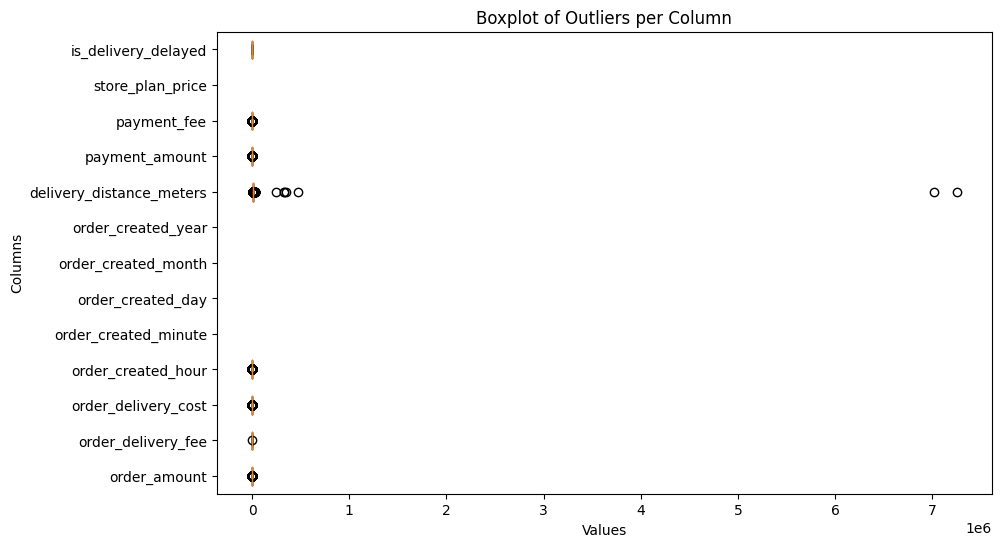

In [266]:
# Select only columns of type float64 or int64
numeric_cols = orders_df.select_dtypes(include=['float64', 'int64'])

# Prepare a list to store outliers for each column
outliers_list = []

# Iterate over the numeric columns
for col in numeric_cols.columns:
    # Calculate the IQR of the column
    Q1 = numeric_cols[col].quantile(0.25)
    Q3 = numeric_cols[col].quantile(0.75)
    IQR = Q3 - Q1

    # Define the lower and upper bounds
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Identify outliers
    outliers = numeric_cols[(numeric_cols[col] < lower_bound) | (numeric_cols[col] > upper_bound)]

    # Add the values of the outliers found to the list
    outliers_list.append(outliers[col].values)

# Plot boxplots for each column with outliers
plt.figure(figsize=(10, 6))
plt.boxplot(outliers_list, labels=numeric_cols.columns, vert=False)
plt.title('Boxplot of Outliers per Column')
plt.xlabel('Values')
plt.ylabel('Columns')
plt.show()

Now, there are some important insights we can collect from the boxplot. **First, let's check the attributes with outliers**:
  * *payment_amount* have only a few outliers, anyway, we'll check below
  * *delivery_distance_meters* have several outliers, so let's also check

In [267]:
# Calculate the IQR of the 'payment_amount' column
Q1 = orders_df['payment_amount'].quantile(0.25)
Q3 = orders_df['payment_amount'].quantile(0.75)
IQR = Q3 - Q1

# Define the lower and upper bounds to identify outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify the outliers
outliers_sorted_payment_amount = outliers.sort_values(by='payment_amount', ascending=False)

# Display the outliers
display(outliers_sorted_payment_amount.head())

# Shape
outliers_sorted_payment_amount.shape

,order_amount,order_delivery_fee,order_delivery_cost,order_created_hour,order_created_minute,order_created_day,order_created_month,order_created_year,delivery_distance_meters,payment_amount,payment_fee,store_plan_price,is_delivery_delayed
25485,703.20,11.9,14.00,14,37,27,3,2021,721.0,715.10,19.31,0.0,1
25590,703.20,11.9,14.00,14,37,27,3,2021,721.0,715.10,19.31,0.0,1
120451,613.00,9.9,0.00,21,59,11,4,2021,2591.0,622.90,9.34,49.0,1
271466,555.75,11.9,6.98,16,38,2,1,2021,4649.0,567.65,15.33,0.0,1
352723,540.00,0.0,8.75,21,2,31,1,2021,3344.0,540.00,8.10,49.9,1


(7581, 13)

In [268]:
# Calculate the IQR of the 'delivery_distance_meters' column
Q1 = orders_df['delivery_distance_meters'].quantile(0.25)
Q3 = orders_df['delivery_distance_meters'].quantile(0.75)
IQR = Q3 - Q1

# Define the lower and upper bounds to identify outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify the outliers
outliers_sorted_delivery_distance_meters = outliers.sort_values(by='delivery_distance_meters', ascending=False)

# Display the outliers
display(outliers_sorted_delivery_distance_meters.head())

# Shape
outliers_sorted_delivery_distance_meters.shape

,order_amount,order_delivery_fee,order_delivery_cost,order_created_hour,order_created_minute,order_created_day,order_created_month,order_created_year,delivery_distance_meters,payment_amount,payment_fee,store_plan_price,is_delivery_delayed
289974,51.9,8.99,30.49,16,12,12,3,2021,30307.0,60.89,0.00,49.9,1
256511,9.5,15.90,3.70,23,13,1,2,2021,16886.0,25.40,0.51,29.0,1
256513,9.5,15.90,20.03,23,17,1,2,2021,15540.0,25.40,0.51,29.0,1
366217,30.0,0.00,17.74,20,22,31,3,2021,14808.0,30.00,0.45,49.0,1
256512,9.5,15.90,4.00,23,15,1,2,2021,14361.0,25.40,0.51,29.0,1


(7581, 13)

The quantity of rows from *payment_amount* and *delivery_distance_meters* are the same. So, the higher is the distance, the higher the price. So... they are outliers but they're also correct values. **So, let's keep it.**


Now, we'll check the attributes that have "no boxplot":
  * *order_created_year*, *order_created_month*, *order_created_day* and *order_created_minute* **are columns with values well defined (year always 2021, month from 1 to 12, day from 1 to 31 and minute from 0 to 60)**
  * *store_plan_price* we need to check what exactly is happening to understand why the boxplot is "empty"

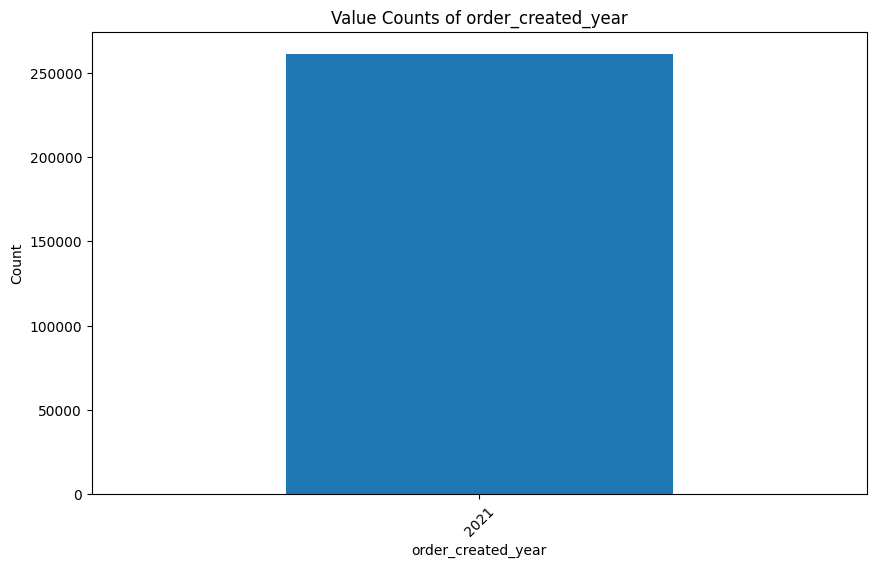

In [269]:
# Count Values
value_counts = orders_df.value_counts('order_created_year')

# Plot
plt.figure(figsize=(10, 6))
value_counts.plot(kind='bar')
plt.title('Value Counts of order_created_year')
plt.xlabel('order_created_year')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

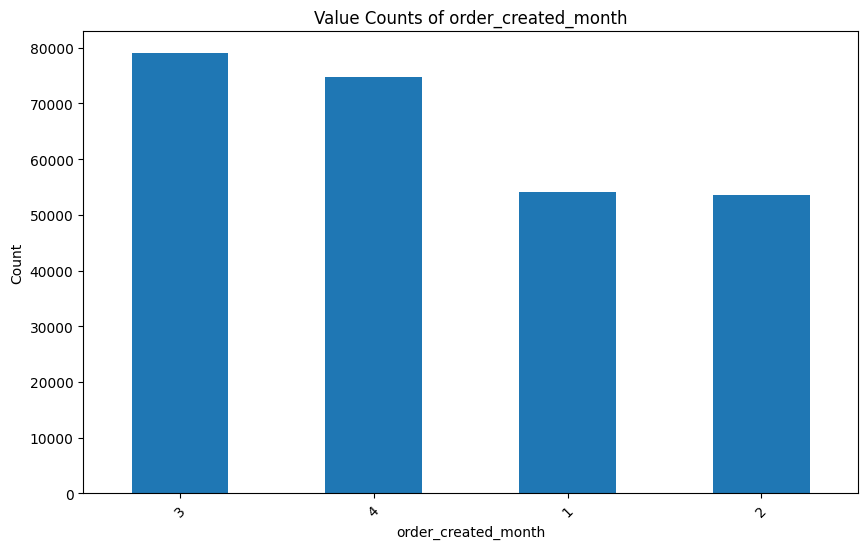

In [270]:
# Count Values
value_counts = orders_df.value_counts('order_created_month')

# Plot
plt.figure(figsize=(10, 6))
value_counts.plot(kind='bar')
plt.title('Value Counts of order_created_month')
plt.xlabel('order_created_month')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

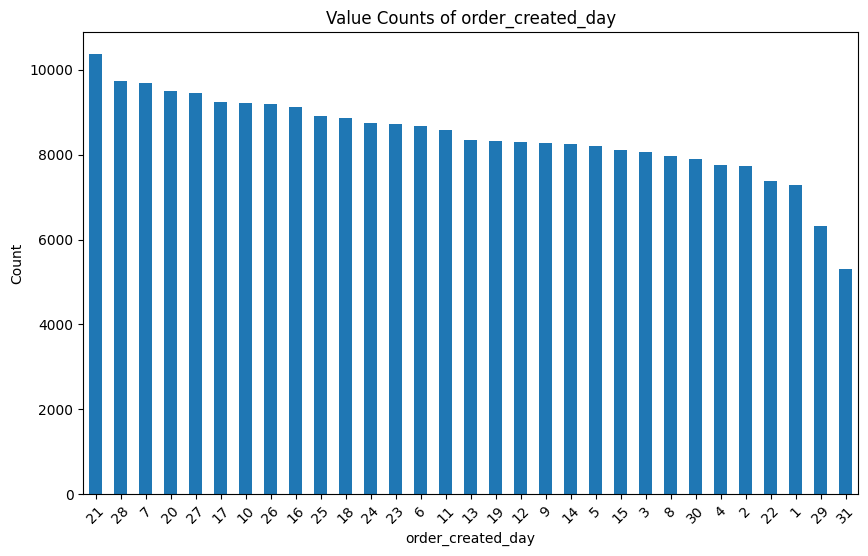

In [271]:
# Count Values
value_counts = orders_df.value_counts('order_created_day')

# Plot
plt.figure(figsize=(10, 6))
value_counts.plot(kind='bar')
plt.title('Value Counts of order_created_day')
plt.xlabel('order_created_day')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

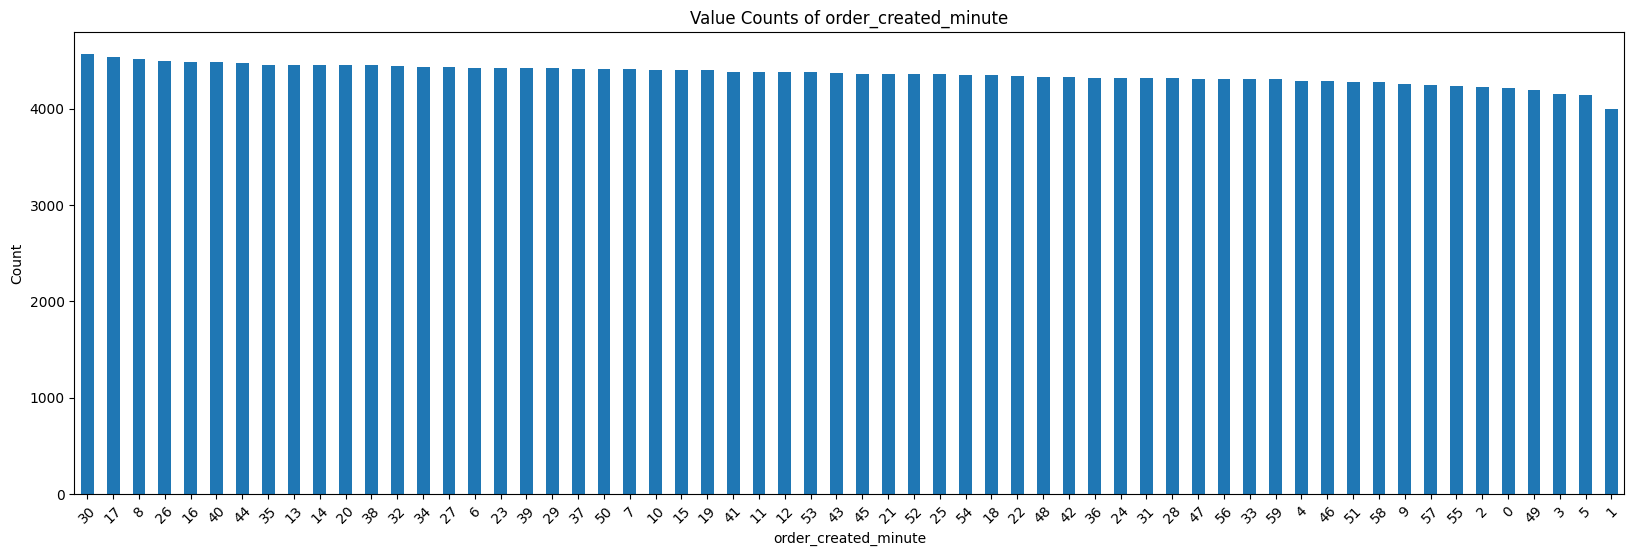

In [272]:
# Count Values
value_counts = orders_df.value_counts('order_created_minute')

# Plot
plt.figure(figsize=(20, 6))
value_counts.plot(kind='bar')
plt.title('Value Counts of order_created_minute')
plt.xlabel('order_created_minute')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

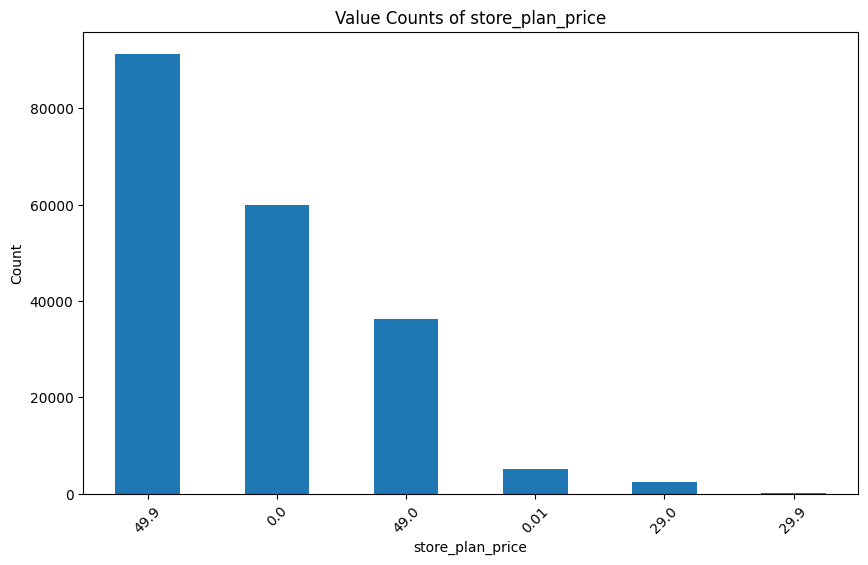

In [273]:
# Count Values
value_counts = orders_df.value_counts('store_plan_price')

# Plot
plt.figure(figsize=(10, 6))
value_counts.plot(kind='bar')
plt.title('Value Counts of store_plan_price')
plt.xlabel('store_plan_price')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

With the charts above we can check that the values are always the same, that is why the boxplot is "empty". So, everything is set.

#### 2.1.7 Null, NaNs and Missings
Let's apply the Nulls and NaNs treatment. Usually these treatments are done before the business rules applications, but, since after the applications we'll have less attributes to analyze, we are performing after.

In [274]:
# Check status of nulls in the columns
orders_df.isnull().sum()

order_amount                    0
order_delivery_fee              0
order_delivery_cost          2559
order_created_hour              0
order_created_minute            0
order_created_day               0
order_created_month             0
order_created_year              0
delivery_distance_meters       12
payment_amount                  0
payment_fee                     0
payment_method                  0
channel_name                    0
channel_type                    0
driver_modal                    0
driver_type                     0
store_plan_price            66055
hub_name                        0
is_delivery_delayed             0
dtype: int64

Now, we'll go deeper into each attribute.

In [275]:
# Order delivery Cost
orders_df[(orders_df['order_delivery_cost'].isnull())]

# Here, let's consider the NaN values as the average of all delivery cost
# Find mean of order delivery cost
mean_delivery_cost = orders_df['order_delivery_cost'].mean()

# Replace the NaN values with the mean
orders_df['order_delivery_cost'].fillna(mean_delivery_cost, inplace=True)

In [276]:
# Delivery Distance Meters
orders_df[(orders_df['delivery_distance_meters'].isnull())]

# Since there are only 12 values, let's drop the instances
orders_df = orders_df.dropna(subset=['delivery_distance_meters'])

The *store_plan_price* have simular data, but, since we don't have further information of why is empty and there is no pattern in the NaN values, we'll choose to drop this column for the model be more precise. In addition, the c

In [277]:
# Drop columns
orders_df = orders_df.drop('store_plan_price', axis=1)

In [278]:
# Check status of nulls in the columns
orders_df.isnull().sum()

order_amount                0
order_delivery_fee          0
order_delivery_cost         0
order_created_hour          0
order_created_minute        0
order_created_day           0
order_created_month         0
order_created_year          0
delivery_distance_meters    0
payment_amount              0
payment_fee                 0
payment_method              0
channel_name                0
channel_type                0
driver_modal                0
driver_type                 0
hub_name                    0
is_delivery_delayed         0
dtype: int64

In [279]:
# Reset index from dataframe
orders_df = orders_df.reset_index(drop=True)

There is no need to transform the data types, since it is all properly set.

#### 2.1.8 Feature Engineering

In [280]:
# Getting columns of type 'object'
object_columns = orders_df.select_dtypes(include=['object']).columns

# Applying one-hot encoding for each column of type 'object'
for column in object_columns:
    orders_df = pd.get_dummies(orders_df, columns=[column])

# Viewing the DataFrame after applying one-hot encoding
display(orders_df.head())

,order_amount,order_delivery_fee,order_delivery_cost,order_created_hour,order_created_minute,order_created_day,order_created_month,order_created_year,delivery_distance_meters,payment_amount,payment_fee,is_delivery_delayed,payment_method_BANK_TRANSFER_DC,payment_method_CREDIT,payment_method_CREDIT_STORE,payment_method_DEBIT,payment_method_DEBIT_STORE,payment_method_INSTALLMENT_CREDIT_STORE,payment_method_MEAL_BENEFIT,payment_method_MONEY,payment_method_ONLINE,payment_method_PAYMENT_LINK,payment_method_STORE_DIRECT_PAYMENT,payment_method_VOUCHER,payment_method_VOUCHER_DC,payment_method_VOUCHER_OL,payment_method_VOUCHER_STORE,channel_name_ALL PLACE,channel_name_ATCHIN PLACE,channel_name_BERLIN PLACE,channel_name_BRAZIL PLACE,channel_name_CAICAI PLACE,channel_name_EATS PLACE,channel_name_FOOD PLACE,channel_name_FULL PLACE,channel_name_LISBON PLACE,channel_name_MADRID PLACE,channel_name_OTHER PLACE,channel_name_OWN PLACE,channel_name_PHONE PLACE,channel_name_READY PLACE,channel_name_REGISTER PLACE,channel_name_RIBA PLACE,channel_name_RONALD PLACE,channel_name_SAN PLACE,channel_name_SEARCH PLACE,channel_name_SHOPP PLACE,channel_name_SPEED PLACE,channel_name_STORE PLACE,channel_name_THINK PLACE,channel_name_VELOCITY PLACE,channel_name_WEAR PLACE,channel_name_WHATS PLACE,channel_type_MARKETPLACE,channel_type_OWN CHANNEL,driver_modal_MOTOBOY,driver_type_FREELANCE,driver_type_LOGISTIC OPERATOR,hub_name_AVENUE SHOPPING,hub_name_BEACH SHOPPING,hub_name_BLACK SHOPPING,hub_name_COFFEE SHOPPING,hub_name_COLOR SHOPPING,hub_name_FORTRAN SHOPPING,hub_name_GOLDEN SHOPPING,hub_name_GREEN SHOPPING,hub_name_HIP HOP SHOPPING,hub_name_HOTMILK SHOPPING,hub_name_PAGODE SHOPPING,hub_name_PEOPLE SHOPPING,hub_name_PHP SHOPPING,hub_name_PURPLE SHOPPING,hub_name_PYTHON SHOPPING,hub_name_R SHOPPING,hub_name_RAP SHOPPING,hub_name_REACT SHOPPING,hub_name_RIVER SHOPPING,hub_name_RUBY SHOPPING,hub_name_SAMPA SHOPPING,hub_name_SMALL SHOPPING,hub_name_SQL SHOPPING,hub_name_STAR SHOPPING,hub_name_SUBWAY SHOPPING,hub_name_WOLF SHOPPING
0,129.45,11.9,8.00,15,17,3,1,2021,1357.0,141.35,3.82,0,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,True,True,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,113.40,11.9,8.24,22,13,14,1,2021,1400.0,113.30,3.06,0,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,True,True,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,113.40,11.9,8.24,22,13,14,1,2021,1400.0,12.00,0.00,0,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,True,True,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,109.40,11.9,7.73,23,13,14,1,2021,6692.0,121.30,3.28,0,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,True,True,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,110.80,11.9,9.32,22,23,15,1,2021,3262.0,

In [281]:
# Changing names of columns to upper case
orders_df.columns = orders_df.columns.str.upper()

# Replace spaces with underscore
orders_df.columns = orders_df.columns.str.replace(' ', '_')

# Check if the operation was well done
orders_df.columns

Index(['ORDER_AMOUNT', 'ORDER_DELIVERY_FEE', 'ORDER_DELIVERY_COST',
       'ORDER_CREATED_HOUR', 'ORDER_CREATED_MINUTE', 'ORDER_CREATED_DAY',
       'ORDER_CREATED_MONTH', 'ORDER_CREATED_YEAR', 'DELIVERY_DISTANCE_METERS',
       'PAYMENT_AMOUNT', 'PAYMENT_FEE', 'IS_DELIVERY_DELAYED',
       'PAYMENT_METHOD_BANK_TRANSFER_DC', 'PAYMENT_METHOD_CREDIT',
       'PAYMENT_METHOD_CREDIT_STORE', 'PAYMENT_METHOD_DEBIT',
       'PAYMENT_METHOD_DEBIT_STORE', 'PAYMENT_METHOD_INSTALLMENT_CREDIT_STORE',
       'PAYMENT_METHOD_MEAL_BENEFIT', 'PAYMENT_METHOD_MONEY',
       'PAYMENT_METHOD_ONLINE', 'PAYMENT_METHOD_PAYMENT_LINK',
       'PAYMENT_METHOD_STORE_DIRECT_PAYMENT', 'PAYMENT_METHOD_VOUCHER',
       'PAYMENT_METHOD_VOUCHER_DC', 'PAYMENT_METHOD_VOUCHER_OL',
       'PAYMENT_METHOD_VOUCHER_STORE', 'CHANNEL_NAME_ALL_PLACE',
       'CHANNEL_NAME_ATCHIN_PLACE', 'CHANNEL_NAME_BERLIN_PLACE',
       'CHANNEL_NAME_BRAZIL_PLACE', 'CHANNEL_NAME_CAICAI_PLACE',
       'CHANNEL_NAME_EATS_PLACE', 'CHANNEL_NAME_F

In [282]:
orders_df.shape

(261457, 84)

Now the data is set to start the machine learning model!

### 2.2 Train and Test
In machine learning, the training step involves feeding a model with labeled data, allowing it to learn patterns and relationships between input features and corresponding outputs. During training, the model adjusts its parameters iteratively to minimize a predefined loss function, optimizing its ability to make accurate predictions.

Once trained, the model is tested using a separate dataset (the test set) that it hasn't seen before. This step evaluates the model's performance on unseen data, assessing its ability to generalize and make accurate predictions beyond the training data. Test results help determine the model's effectiveness and whether adjustments are needed to improve its performance or generalization capabilities.

#### 2.2.1 Holdout Division
The holdout method is a model evaluation technique in machine learning, where the available dataset is divided into two distinct sets: a training set and a test set. The training set is used to train the model, while the test set is withheld, or "held out," and is not used during training. After training, the model is evaluated on the test set to assess its performance on previously unseen data. This technique is crucial for verifying whether the model can generalize well to new data and to avoid overfitting.

First, let's create our variables for the train and test.

In [283]:
# Creating a variable with the return the values in an array format
array = orders_df.values

# Finding the position of the target attribute
target_column_position = orders_df.columns.get_loc('IS_DELIVERY_DELAYED')

# Creating the variable X, with X = attributes that will be used as features (features = atributos de entrada)
X = array[:, np.r_[:target_column_position, 13:84]] # Select all instances (using ":"), but only the columns 0-11 and 13-84 (using "np.r_[:12, 13:85]")

# Creating the variable y, with y = attribute that will be used as label (or target) (label / target = atributo de saída)
y = array[:,target_column_position]

Than, let's split the data in train and test. We'll use 20% as test `test_size = 0.20` and define a seed to ensure that the data will be properly splited `random_state = 7`.

NOTE: increasing the size of `test_size` will result in a less accurate code, but it will be more performant (for general testing purposes, it's a good idea to use high values of test_size).

In [284]:
# Dividing the model into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.90, random_state=7) # MUDAR O TEST_SIZE PARA 0.20, AGORA APENAS PARA SER MAIS PERFORMÁTICO

# Transform the data to be able to perform the cross validation
X_train = X_train.astype(int)
X_test = X_test.astype(int)
y_train = y_train.astype(int)
y_test = y_test.astype(int)

# Getting the number of instances and attributes for the training and test sets
print(f"Number of instances and attributes for the training data: {X_train.shape}")
print(f"Number of instances and attributes for the test data: {X_test.shape}")

Number of instances and attributes for the training data: (26145, 82)
Number of instances and attributes for the test data: (235312, 82)


### 2.2.2 Cross Validation
The main goal of cross-validation is to estimate how well the model will generalize to unseen data, i.e., data that were not used during the model training. The basic procedure involves dividing the available dataset into smaller subsets, called "folds." One of these subsets is retained as test data for model evaluation, while the others are used as training data. This process is repeated several times, with each subset being used as the test set in different iterations. There are various cross-validation strategies, with k-fold cross-validation being one of the most common. In this approach, the data is divided into k subsets (folds), and the training and evaluation process is repeated k times, each time using a different fold as the test set and the remaining as the training set. At the end of the k iterations, performance metrics are calculated, including:
  * Accuracy - Measures the proportion of correct predictions made by the model relative to the total predictions. It is a simple and widely used metric but may not be suitable for imbalanced datasets, where one class is much more frequent than the other.
  * Precision - Measures the proportion of true positives (correct predictions of the positive class) relative to the total examples classified as positive by the model. It is useful when correctly identifying positives is a priority, and false positives are undesirable.
  * Recall - Measures the proportion of true positives relative to the total examples of the positive class in the dataset. It is useful when identifying all positive examples is crucial, and having some false positives is tolerable.
  * F1-score - Harmonic mean of precision and recall. It provides a balance between precision and recall, useful when there is a class imbalance or when both false positive and false negative rates are important.
  * ROC Curve (Receiver Operating Characteristic Curve) - Graphical representation of the true positive rate (sensitivity) versus the false positive rate (1 - specificity) for different classification thresholds. AUC-ROC is a metric that quantifies the model's discriminative ability to distinguish between classes. A higher AUC-ROC value indicates a better-performing classification model.
  
These metrics are calculated for each test fold. **The average of these metrics is then used as an estimate of the model's performance on the dataset as a whole**. Cross-validation is an important technique to ensure that the model is robust and generalizes well to new data, as well as to help avoid issues such as overfitting and underfitting.

The first part is to define the number of partitions (folds) for the cross-validation. Here, we should define it according to the number of instances we have in our dataset. Let's apply 10 partitions since we have only 261457 instances in our dataset. In addition `shuffle=True`, the data will be shuffled and the seed will be 7 (`random_state=7`).

In [285]:
# Defining the number of folds for the cross validation
num_partitions = 3 # MUDAR PARA 10, AGORA APENAS PARA RODAR MAIS RÁPIDO

# Create an object to perform the cross validation
kfold = KFold(n_splits=num_partitions, shuffle=True, random_state=7)

In [291]:
np.random.seed(7) # setting a global seed

# List to store the models
models = []

# Creating the models and adding them to the models list
models.append(('LR', LogisticRegression(max_iter=200)))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))

# Setting base classifier parameters for BaggingClassifier
base = DecisionTreeClassifier()
num_trees = 100
max_features = 3

# Creating models for VotingClassifier
bases = []
model1 = LogisticRegression(max_iter=200)
bases.append(('logistic', model1))
model2 = DecisionTreeClassifier()
bases.append(('cart', model2))
model3 = SVC()
bases.append(('svm', model3))

# Creating ensembles and adding them to the models list
models.append(('Bagging', BaggingClassifier(base_estimator=base, n_estimators=num_trees)))
models.append(('RF', RandomForestClassifier(n_estimators=num_trees, max_features=max_features)))
models.append(('ET', ExtraTreesClassifier(n_estimators=num_trees, max_features=max_features)))
models.append(('Ada', AdaBoostClassifier(n_estimators=num_trees)))
models.append(('GB', GradientBoostingClassifier(n_estimators=num_trees)))
models.append(('Voting', VotingClassifier(bases)))

# Lists to store results
results = []
names = []

# Model evaluation
for name, model in models:
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring='accuracy')
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

LR: 0.971046 (0.002021)
KNN: 0.970740 (0.002055)
CART: 0.950851 (0.001914)
NB: 0.820348 (0.002075)
SVM: 0.971123 (0.001914)
Bagging: 0.974641 (0.001170)
RF: 0.972194 (0.001788)
ET: 0.971543 (0.001239)
Ada: 0.972538 (0.002677)
GB: 0.973685 (0.001741)
Voting: 0.971123 (0.001914)


In [292]:
print (results)

[array([0.973, 0.968, 0.972]), array([0.973, 0.968, 0.972]), array([0.949, 0.950, 0.954]), array([0.821, 0.817, 0.822]), array([0.973, 0.968, 0.972]), array([0.976, 0.973, 0.975]), array([0.973, 0.970, 0.974]), array([0.972, 0.970, 0.973]), array([0.976, 0.969, 0.973]), array([0.975, 0.971, 0.974]), array([0.973, 0.968, 0.972])]


##### 2.2.2.5 Results
In this section, it will be presented the performance evaluation of various machine learning models applied to our dataset. The models were assessed using k-fold cross-validation technique to ensure robustness and reliability of the results.
We evaluated a diverse set of classifiers, including Logistic Regression (LR), K-Nearest Neighbors (KNN), Decision Tree (CART), Naive Bayes (NB), Support Vector Machine (SVM), Bagging, Random Forest (RF), Extra Trees (ET), AdaBoost (Ada), Gradient Boosting (GB), and a Voting ensemble.

The mean accuracy and standard deviation of each model are summarized below:

- **Logistic Regression (LR):** Achieved a mean accuracy of 97.1046% with a standard deviation of 0.002021.
- **K-Nearest Neighbors (KNN):** Attained a mean accuracy of 97.0740% with a standard deviation of 0.002055.
- **Decision Tree (CART):** Obtained a mean accuracy of 95.0851% with a standard deviation of 0.001914.
- **Naive Bayes (NB):** Demonstrated a mean accuracy of 82.0348% with a standard deviation of 0.002075.
- **Support Vector Machine (SVM):** Recorded a mean accuracy of 97.1123% with a standard deviation of 0.001914.
- **Bagging:** Emerged as the top-performing model with a mean accuracy of 97.4641% and a standard deviation of 0.00117.
- **Random Forest (RF):** Achieved a competitive mean accuracy of 97.2194% with a standard deviation of 0.001788.
- **Extra Trees (ET):** Produced a mean accuracy of 97.1543% with a standard deviation of 0.001239.
- **AdaBoost (Ada):** Yielded a mean accuracy of 97.2538% with a standard deviation of 0.002677.
- **Gradient Boosting (GB):** Showcased a mean accuracy of 97.3685% with a standard deviation of 0.001741.
- **Voting Ensemble:** Delivered a mean accuracy of 97.1123% with a standard deviation of 0.001914.

The boxplot below visually illustrates the distribution of accuracy scores across different models:

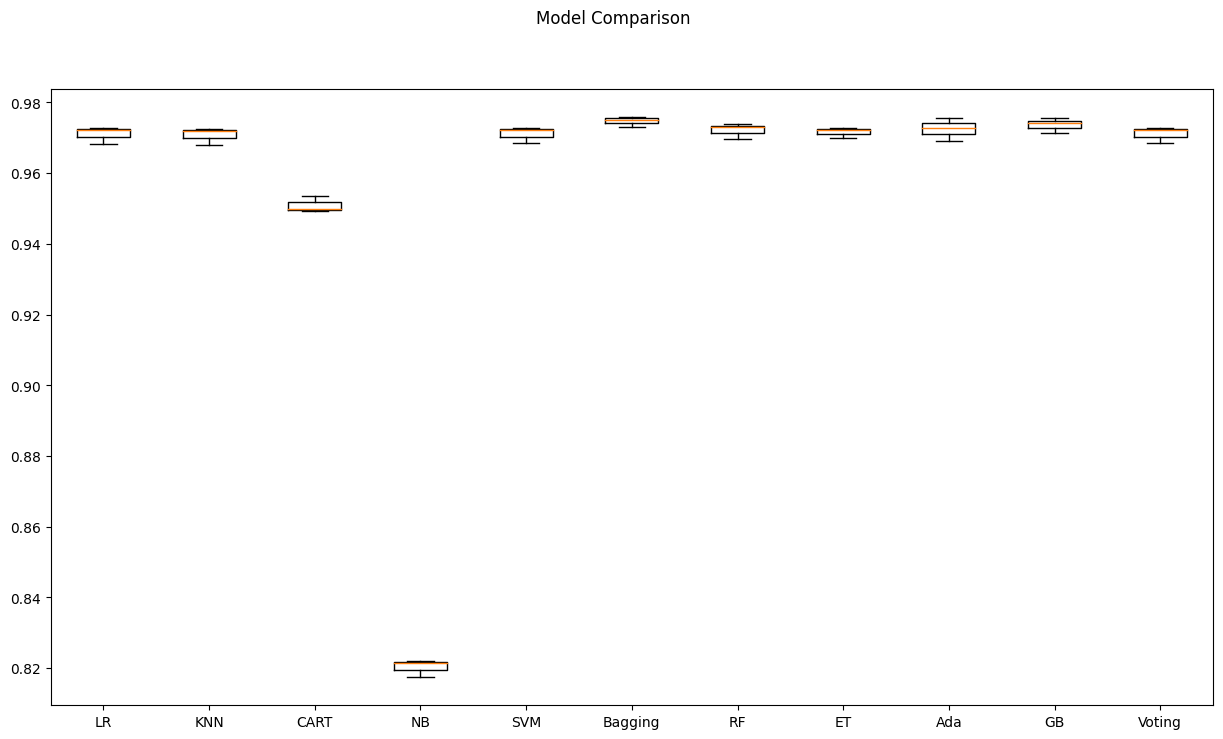

In [293]:
# Boxplot for model comparison
fig = plt.figure(figsize=(15,8))
fig.suptitle('Model Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

Among the evaluated models, **Bagging**, **Random Forest**, and **Gradient Boosting** demonstrated the highest mean accuracies, all surpassing 97%. These ensemble methods showed superior performance compared to standalone classifiers like Logistic Regression, K-Nearest Neighbors, and Decision Tree. Notably, Naive Bayes exhibited lower accuracy, likely due to its simplistic assumption of feature independence.

Overall, the results indicate that ensemble techniques, particularly Bagging and Gradient Boosting, are well-suited for our dataset, providing robust predictions with high accuracy. These findings suggest potential avenues for further exploration and deployment of machine learning models in practical applications.

### 2.3 Feature Selection
Feature selection is the process of selecting a subset of the original features from a dataset that are most relevant to the specific problem being addressed. Its objective is to enhance model performance, mitigate overfitting, reduce training time, and enhance interpretability by eliminating irrelevant, redundant, or detrimental features. This process can be accomplished through various techniques, including statistical methods, heuristic approaches, and model-based strategies. Essentially, feature selection streamlines and optimizes the modeling process by retaining only the most crucial features for predicting or elucidating the target variable.

Some methods of feature selection include:

* Univariate selection
* Recursive feature elimination (RFE)
* Feature importance


#### 2.2.1 Univariate Selection

In univariate selection, statistical tests are used to select attributes that have the strongest relationship with the output variable. SelectKBest is the most commonly used technique. It can be used with various statistical metrics (in the `score_func` parameter), such as:

* Chi-squared test `chi2` (categorical input and numerical output **and** categorical input and categorical output)
* ANOVA `f_classif` (numerical input and categorical output)
* Pearson correlation `f_regression` (numerical input and numerical output)

Univariate selection, as the name suggests, analyzes each feature individually, regardless of other features. A statistical metric is computed for each feature with respect to the output variable. Based on this metric, features that have a statistically significant relationship with the output variable are selected.

 **SELECTKBEST ONLY ACCEPTS NUMERICAL INPUTS (SO FOR CATEGORICAL INPUTS, IT IS NECESSARY TO CONVERT THEM TO NUMBERS, EITHER USING ONE-HOT ENCODING OR ANOTHER METHOD)**.


##### 2.2.1.1 Categorical Values

In [226]:
# Selecting only the categorical values and creating a new dataframe
orders_categorical_df = orders_df.select_dtypes(include=bool)

# Adding the target column
orders_categorical_df['IS_DELIVERY_DELAYED'] = orders_df['IS_DELIVERY_DELAYED']

# Shape
orders_categorical_df.shape

(261457, 73)

In [227]:
# Let's start by spliting our dataset into train and test (holdout)
# The code below returns the data in a numpy array format. Example: [[a,1,3], [b,2,7]]), that each "list (between []) is an instance"
array = orders_categorical_df.values

# Finding position of the target column
target_column_position = orders_categorical_df.columns.get_loc('IS_DELIVERY_DELAYED')

X = array[:, 0:72] # Attributes. Just use the dataset.shape and use one value less than the number of columns
y = array[:,target_column_position] # Classes

# To integer
X = X.astype(int)
y = y.astype(int)

In [228]:
# Utilizando A nova F-value (depois verificar)
# Seleção dos atributos com selectKBest
best_var = SelectKBest(score_func = chi2, k = 72) # k é o numero de atributos que teremos no final

# Executa a função de pontuação em (X, y) e obtem os atributos selecionados
fit = best_var.fit(X, y)

# Reduz X para os atributos selecionados
features = fit.transform(X)

# Results
print(f'\nNúmero original de atributos:', X.shape[1])
print(f' \nNúmero reduzido de atributos:', features.shape[1])

# Exibe atributos originais
print("\nAtributos Originais:", orders_categorical_df.columns)

# Exibe as pontuações de cada atributo e os 4 escolhidos (com as pontuações mais altas)
np.set_printoptions(precision=3, suppress=True, formatter={'float': '{:0.3f}'.format}) # 3 casas decimais e não suprimir a formatação exponencial

# Creating Variable for chi2
scores_chi2 = fit.scores_

# Print
print("\nScores dos Atributos Originais:", scores_chi2)
print("\nAtributos Selecionados:", best_var.get_feature_names_out(input_features = orders_categorical_df.columns[0:72])) # O valor aqui é 1 a menos do shape


Número original de atributos: 72
 
Número reduzido de atributos: 72

Atributos Originais: Index(['PAYMENT_METHOD_BANK_TRANSFER_DC', 'PAYMENT_METHOD_CREDIT',
       'PAYMENT_METHOD_CREDIT_STORE', 'PAYMENT_METHOD_DEBIT',
       'PAYMENT_METHOD_DEBIT_STORE', 'PAYMENT_METHOD_INSTALLMENT_CREDIT_STORE',
       'PAYMENT_METHOD_MEAL_BENEFIT', 'PAYMENT_METHOD_MONEY',
       'PAYMENT_METHOD_ONLINE', 'PAYMENT_METHOD_PAYMENT_LINK',
       'PAYMENT_METHOD_STORE_DIRECT_PAYMENT', 'PAYMENT_METHOD_VOUCHER',
       'PAYMENT_METHOD_VOUCHER_DC', 'PAYMENT_METHOD_VOUCHER_OL',
       'PAYMENT_METHOD_VOUCHER_STORE', 'CHANNEL_NAME_ALL_PLACE',
       'CHANNEL_NAME_ATCHIN_PLACE', 'CHANNEL_NAME_BERLIN_PLACE',
       'CHANNEL_NAME_BRAZIL_PLACE', 'CHANNEL_NAME_CAICAI_PLACE',
       'CHANNEL_NAME_EATS_PLACE', 'CHANNEL_NAME_FOOD_PLACE',
       'CHANNEL_NAME_FULL_PLACE', 'CHANNEL_NAME_LISBON_PLACE',
       'CHANNEL_NAME_MADRID_PLACE', 'CHANNEL_NAME_OTHER_PLACE',
       'CHANNEL_NAME_OWN_PLACE', 'CHANNEL_NAME_PHONE_PL

##### 2.2.1.2 Numerical Values

In [229]:
# Selecting only the numerical values and creating a new dataframe
orders_numerical_df = orders_df.select_dtypes(exclude=bool)

# Adding the target column
orders_numerical_df['IS_DELIVERY_DELAYED'] = orders_df['IS_DELIVERY_DELAYED']

# Shape
orders_numerical_df.shape

(261457, 12)

In [230]:
# Let's start by spliting our dataset into train and test (holdout)
# The code below returns the data in a numpy array format. Example: [[a,1,3], [b,2,7]]), that each "list (between []) is an instance"
array = orders_numerical_df.values

# Finding position of the target column
target_column_position = orders_numerical_df.columns.get_loc('IS_DELIVERY_DELAYED')

X = array[:, 0:11] # Attributes. Just use the dataset.shape and use one value less than the number of columns
y = array[:,target_column_position] # Classes

# To integer
X = X.astype(int)
y = y.astype(int)

In [232]:
# Utilizando A nova F-value (depois verificar)
# Seleção dos atributos com selectKBest
best_var = SelectKBest(score_func = f_classif, k = 11) # k é o numero de atributos que teremos no final

# Executa a função de pontuação em (X, y) e obtem os atributos selecionados
fit = best_var.fit(X, y)

# Reduz X para os atributos selecionados
features = fit.transform(X)

# Results
print(f'\nNúmero original de atributos:', X.shape[1])
print(f' \nNúmero reduzido de atributos:', features.shape[1])

# Exibe atributos originais
print("\nAtributos Originais:", orders_numerical_df.columns)

# Exibe as pontuações de cada atributo e os 4 escolhidos (com as pontuações mais altas)
np.set_printoptions(precision=3, suppress=True, formatter={'float': '{:0.3f}'.format}) # 3 casas decimais e não suprimir a formatação exponencial

# Creating Variable for Anova
scores_f_classif = fit.scores_

print("\nScores dos Atributos Originais:", scores_f_classif)
print("\nAtributos Selecionados:", best_var.get_feature_names_out(input_features = orders_numerical_df.columns[0:11])) # O valor aqui é 1 a menos do shape


Número original de atributos: 11
 
Número reduzido de atributos: 11

Atributos Originais: Index(['ORDER_AMOUNT', 'ORDER_DELIVERY_FEE', 'ORDER_DELIVERY_COST',
       'ORDER_CREATED_HOUR', 'ORDER_CREATED_MINUTE', 'ORDER_CREATED_DAY',
       'ORDER_CREATED_MONTH', 'ORDER_CREATED_YEAR', 'DELIVERY_DISTANCE_METERS',
       'PAYMENT_AMOUNT', 'PAYMENT_FEE', 'IS_DELIVERY_DELAYED'],
      dtype='object')

Scores dos Atributos Originais: [218.613 812.518 744.822 0.207 0.074 96.191 56.934 -261455.000 4.171
 458.042 806.867]

Atributos Selecionados: ['ORDER_AMOUNT' 'ORDER_DELIVERY_FEE' 'ORDER_DELIVERY_COST'
 'ORDER_CREATED_HOUR' 'ORDER_CREATED_MINUTE' 'ORDER_CREATED_DAY'
 'ORDER_CREATED_MONTH' 'ORDER_CREATED_YEAR' 'DELIVERY_DISTANCE_METERS'
 'PAYMENT_AMOUNT' 'PAYMENT_FEE']


##### 2.2.1.3 Selecting Best Features

In [233]:
# Create an empty dictionary to store the consolidated scores
consolidated_scores = {}

# Add chi2 scores to the consolidated dictionary for the categorical dataframe
for i, feature in enumerate(orders_categorical_df.columns):
    if i < len(scores_chi2):
        consolidated_scores[feature] = scores_chi2[i]

# Add f_classif scores to the consolidated dictionary for the numerical dataframe
for i, feature in enumerate(orders_numerical_df.columns):
    if i < len(scores_f_classif):
        if feature in consolidated_scores:
            consolidated_scores[feature] += scores_f_classif[i]  # If the feature already exists, add the scores
        else:
            consolidated_scores[feature] = scores_f_classif[i]   # If the feature does not exist, create a new entry

# Sort the consolidated scores in descending order by score values
sorted_scores = sorted(consolidated_scores.items(), key=lambda x: x[1], reverse=True)

# Convert the sorted scores into a DataFrame
df_scores = pd.DataFrame(sorted_scores, columns=['Feature', 'Score'])

# Create a list with information about the origin DataFrame of the features
df_origin = []
for feature in df_scores['Feature']:
    if feature in orders_categorical_df.columns:
        df_origin.append('orders_categorical_df')
    elif feature in orders_numerical_df.columns:
        df_origin.append('orders_numerical_df')
    else:
        df_origin.append('Unknown')

# Add the list as a new column in the DataFrame
df_scores.insert(loc=1, column='DataFrame', value=df_origin)

# Add a sequential numeric column
df_scores['Rank'] = range(1, len(df_scores) + 1)

# Set the 'Rank' column as the index of the DataFrame
df_scores.set_index('Rank', inplace=True)

# Display the DataFrame
display(df_scores)

,Feature,DataFrame,Score
Rank,,,
1,HUB_NAME_PYTHON_SHOPPING,orders_categorical_df,3444.624479
2,HUB_NAME_FORTRAN_SHOPPING,orders_categorical_df,3201.647097
3,HUB_NAME_PHP_SHOPPING,orders_categorical_df,852.021966
4,CHANNEL_NAME_BRAZIL_PLACE,orders_categorical_df,839.748612
5,ORDER_DELIVERY_FEE,orders_numerical_df,812.518059
6,PAYMENT_FEE,orders_numerical_df,806.867311
7,CHANNEL_NAME_EATS_PLACE,orders_categorical_df,750.382981
8,ORDER_DELIVERY_COST,orders_numerical_df,744.821954
9,DRIVER_TYPE_LOGISTIC_OPERATOR,orders_categorical_df,675.478228


Now, let's select only the best 25% of the features.

In [236]:
# Suppose you want to keep the top 25% best features
percentile = 25

# Calculate the total number of features
total_features = len(df_scores)

# Calculate the number of features you want to keep
num_features_to_keep = int(np.ceil(total_features * percentile / 100))

# Select the features based on the percentile
selected_features = df_scores.head(num_features_to_keep)

# Display the selected features
display(selected_features)

,Feature,DataFrame,Score
Rank,,,
1,HUB_NAME_PYTHON_SHOPPING,orders_categorical_df,3444.624479
2,HUB_NAME_FORTRAN_SHOPPING,orders_categorical_df,3201.647097
3,HUB_NAME_PHP_SHOPPING,orders_categorical_df,852.021966
4,CHANNEL_NAME_BRAZIL_PLACE,orders_categorical_df,839.748612
5,ORDER_DELIVERY_FEE,orders_numerical_df,812.518059
6,PAYMENT_FEE,orders_numerical_df,806.867311
7,CHANNEL_NAME_EATS_PLACE,orders_categorical_df,750.382981
8,ORDER_DELIVERY_COST,orders_numerical_df,744.821954
9,DRIVER_TYPE_LOGISTIC_OPERATOR,orders_categorical_df,675.478228


#### 2.2.2 Recursive Feature Elimination

In recursive feature elimination, attributes are removed recursively, and a model is built with the remaining ones, using the model's outcome (e.g., accuracy) to identify which attributes contribute most to predicting the output variable. It considers the overall model performance. **You choose a model algorithm (such as Logistic Regression, SVM, Decision Trees, etc.) and train the model with all the features**. Then, you evaluate the importance of each feature using the trained model and recursively eliminate the least important features until a stopping criterion is met.


In [205]:
orders_df.shape

(261457, 84)

In [242]:
# Choice of base estimator
base_estimator = DecisionTreeClassifier()

# Creation of BaggingClassifier with the base estimator
bagging_model = BaggingClassifier(base_estimator=base_estimator, n_estimators=10)

# Recursive Feature Elimination with Bagging
rfe_bagging = RFE(bagging_model, n_features_to_select=20)
fit_bagging = rfe_bagging.fit(X, y)

# Print the results
print("\nNumber of top attributes: %d" % sum(fit_bagging.support_))
selected_features_bagging = [orders_df.columns[i] for i in range(len(fit_bagging.support_)) if fit_bagging.support_[i]]
print("\nNames of Selected Attributes: %s" % selected_features_bagging)


Number of top attributes: 11

Names of Selected Attributes: ['ORDER_AMOUNT', 'ORDER_DELIVERY_FEE', 'ORDER_DELIVERY_COST', 'ORDER_CREATED_HOUR', 'ORDER_CREATED_MINUTE', 'ORDER_CREATED_DAY', 'ORDER_CREATED_MONTH', 'ORDER_CREATED_YEAR', 'DELIVERY_DISTANCE_METERS', 'PAYMENT_AMOUNT', 'PAYMENT_FEE']


The number of top attributes returned as 11 instead of 20 because you specified n_features_to_select = 20 when creating the RFE (Recursive Feature Elimination).
However, in the dataset, the RFE process selected only 11 features as the most relevant ones. This discrepancy arises because RFE selects the specified number of features based on their relevance to the target variable. In your case, even though you specified 20 features to select, the algorithm determined that only 11 features were sufficient to represent the data effectively.

#### 2.2.3 Feature Importance
In the feature importance analysis, machine learning algorithms such as Random Forest or Extra Trees are employed to estimate the importance of attributes, thereby conducting a preliminary selection. It's also possible to perform feature selection intrinsically, using algorithms that automatically select attributes as part of the model training process (for example, linear regression with Lasso regularization and decision trees).

In [249]:
# Criação de modelo para seleção de atributos
model = ExtraTreesClassifier(n_estimators = 100)
model.fit(X, y)

# Exibe Atributos Originais
print("\nAtributos Originais:", orders_df.columns[0:84])

# Exibe a pontuação de importância para cada atributo (quanto maior a pontuação, mais importante é o atributo)
for feature, importance in zip(orders_df.columns[0:84], model.feature_importances_):
    print(f"{feature}: {importance}")


Atributos Originais: Index(['ORDER_AMOUNT', 'ORDER_DELIVERY_FEE', 'ORDER_DELIVERY_COST',
       'ORDER_CREATED_HOUR', 'ORDER_CREATED_MINUTE', 'ORDER_CREATED_DAY',
       'ORDER_CREATED_MONTH', 'ORDER_CREATED_YEAR', 'DELIVERY_DISTANCE_METERS',
       'PAYMENT_AMOUNT', 'PAYMENT_FEE', 'IS_DELIVERY_DELAYED',
       'PAYMENT_METHOD_BANK_TRANSFER_DC', 'PAYMENT_METHOD_CREDIT',
       'PAYMENT_METHOD_CREDIT_STORE', 'PAYMENT_METHOD_DEBIT',
       'PAYMENT_METHOD_DEBIT_STORE', 'PAYMENT_METHOD_INSTALLMENT_CREDIT_STORE',
       'PAYMENT_METHOD_MEAL_BENEFIT', 'PAYMENT_METHOD_MONEY',
       'PAYMENT_METHOD_ONLINE', 'PAYMENT_METHOD_PAYMENT_LINK',
       'PAYMENT_METHOD_STORE_DIRECT_PAYMENT', 'PAYMENT_METHOD_VOUCHER',
       'PAYMENT_METHOD_VOUCHER_DC', 'PAYMENT_METHOD_VOUCHER_OL',
       'PAYMENT_METHOD_VOUCHER_STORE', 'CHANNEL_NAME_ALL_PLACE',
       'CHANNEL_NAME_ATCHIN_PLACE', 'CHANNEL_NAME_BERLIN_PLACE',
       'CHANNEL_NAME_BRAZIL_PLACE', 'CHANNEL_NAME_CAICAI_PLACE',
       'CHANNEL_NAME_EATS_P

## 3 Modeling and Training
Objetivo: construir modelos para resolver o problema em questão.

* Selecione os algoritmos mais indicados para o problema e dataset escolhidos, justificando as suas escolhas. OK
* Há algum ajuste inicial para os hiperparâmetros?
* O modelo foi devidamente treinado? Foi observado problema de underfitting? Sim, porem de over.
* É possível otimizar os hiperparâmetros de algum dos modelos? Se sim, faça-o, justificando todas as escolhas.
* Há algum método avançado ou mais complexo que possa ser avaliado?
* Posso criar um comitê de modelos diferentes para o problema (ensembles)?

### 3.1 Selecting Algorithms
Selecting algorithms is a crucial step in machine learning model development. It involves choosing the most suitable algorithms based on the problem requirements, available data, and project goals. This requires a deep understanding of the available algorithms, their advantages, and limitations. A thoughtful approach to algorithm selection can significantly impact the performance and effectiveness of the final model, enabling it to meet the specific needs of the problem at hand.

#### 3.1.1 Bagging Classifier
The Bagging Classifier is a powerful ensemble learning technique used in machine learning. It works by training multiple base learners, often decision trees, on different subsets of the training data and then combining their predictions through averaging (for regression) or voting (for classification). This approach helps reduce overfitting and improve generalization by leveraging the wisdom of crowds. Bagging Classifier is particularly effective when used with unstable models or when dealing with high variance datasets. By aggregating the predictions of multiple models, it often leads to more robust and accurate predictions compared to individual models trained on the entire dataset.

In [319]:
# Criando um modelo base (Decision Tree)
decision_tree_model = DecisionTreeClassifier()

# Criando o modelo Bagging
bagging_model = BaggingClassifier(decision_tree_model, n_estimators=10, random_state=42)

# Treinando o modelo Bagging com o conjunto de treino
bagging_model.fit(X_train, y_train)

# Fazendo as predições com o conjunto de teste
testpred = bagging_model.predict(X_test)

# Estimando a metricas de avaliação no conjunto de teste
print("Accuracy:", accuracy_score(y_test, testpred))
print("Precision:", precision_score(y_test, testpred))
print("F1:", f1_score(y_test, testpred))
print("Recall:", recall_score(y_test, testpred))
print("ROC AUC:", roc_auc_score(y_test, testpred))

Accuracy: 0.974204460461005
Precision: 0.643945163747144
F1: 0.3578078713499788
Recall: 0.24772927043656606
ROC AUC: 0.6218185579969217


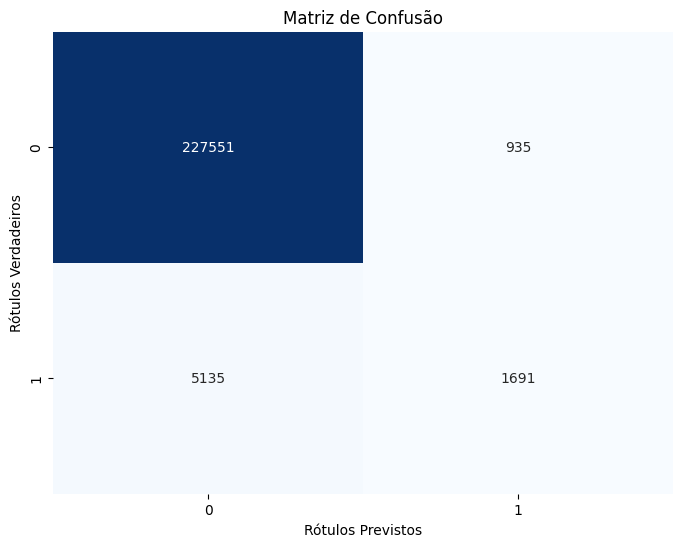

In [320]:
# Faça previsões no conjunto de teste
y_pred = bagging_model.predict(X_test)

# Calcule a matriz de confusão usando os rótulos verdadeiros (y_test) e as previsões do modelo (y_pred)
cm = confusion_matrix(y_test, y_pred)

# Plotar a matriz de confusão como um mapa de calor usando seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g', cbar=False)
plt.title('Matriz de Confusão')
plt.xlabel('Rótulos Previstos')
plt.ylabel('Rótulos Verdadeiros')
plt.show()

#### 3.1.2 Random Forest
Random Forest is a popular ensemble learning technique in machine learning. It creates multiple decision trees using random subsets of the data and features, reducing overfitting. By combining the predictions of these trees, it offers robustness and high accuracy, making it a go-to choice for various tasks.

In [321]:
# Criando o modelo Random Forest
rf_model = RandomForestClassifier(n_estimators=10, random_state=42)

# Treinando o modelo Random Forest com o conjunto de treino
rf_model.fit(X_train, y_train)

# Fazendo as predições com o conjunto de teste
testpred = rf_model.predict(X_test)

# Estimando a metricas de avaliação no conjunto de teste
print("Accuracy:", accuracy_score(y_test, testpred))
print("Precision:", precision_score(y_test, testpred))
print("F1:", f1_score(y_test, testpred))
print("Recall:", recall_score(y_test, testpred))
print("ROC AUC:", roc_auc_score(y_test, testpred))

Accuracy: 0.975084143605086
Precision: 0.7781629116117851
F1: 0.3148299637723501
Recall: 0.19733372399648402
ROC AUC: 0.5978265479308593


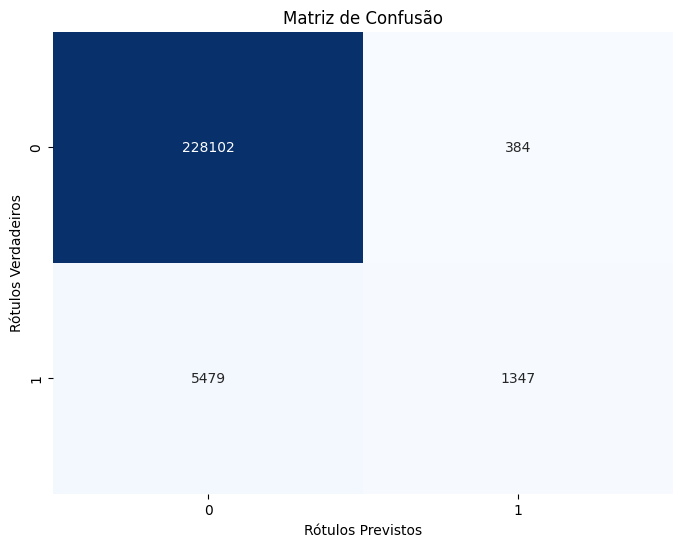

In [307]:
# Faça previsões no conjunto de teste
y_pred = rf_model.predict(X_test)

# Calcule a matriz de confusão usando os rótulos verdadeiros (y_test) e as previsões do modelo (y_pred)
cm = confusion_matrix(y_test, y_pred)

# Plotar a matriz de confusão como um mapa de calor usando seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g', cbar=False)
plt.title('Matriz de Confusão')
plt.xlabel('Rótulos Previstos')
plt.ylabel('Rótulos Verdadeiros')
plt.show()

#### 3.1.3 Gradient Boosting
Gradient Boosting is a machine learning technique that sequentially adds weak learners (usually decision trees) to correct errors made by previous models. It's effective for regression and classification tasks, providing high accuracy, especially with complex datasets.

In [322]:
# Criando o modelo Gradient Boosting
gb_model = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, random_state=42)

# Treinando o modelo Gradient Boosting com o conjunto de treino
gb_model.fit(X_train, y_train)

# Fazendo as predições com o conjunto de teste
testpred = gb_model.predict(X_test)

# Estimando a metricas de avaliação no conjunto de teste
print("Accuracy:", accuracy_score(y_test, testpred))
print("Precision:", precision_score(y_test, testpred))
print("F1:", f1_score(y_test, testpred))
print("Recall:", recall_score(y_test, testpred))
print("ROC AUC:", roc_auc_score(y_test, testpred))

Accuracy: 0.9744254436662814
Precision: 0.6976516634050881
F1: 0.32153325817361894
Recall: 0.20890711983592147
ROC AUC: 0.6031011794657668


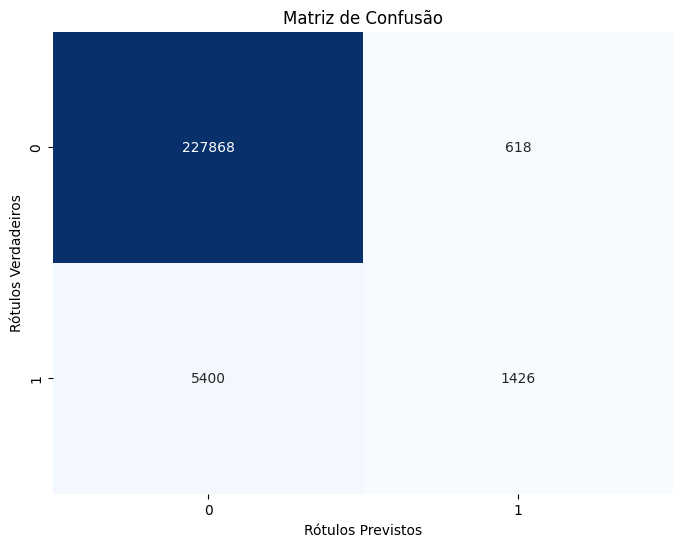

In [310]:
# Fazendo previsões com o conjunto de teste
y_pred = gb_model.predict(X_test)

# Calculando a matriz de confusão
cm = confusion_matrix(y_test, y_pred)

# Plotando a matriz de confusão como um mapa de calor usando seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g', cbar=False)
plt.title('Matriz de Confusão')
plt.xlabel('Rótulos Previstos')
plt.ylabel('Rótulos Verdadeiros')
plt.show()

#### 3.1.4 Final Algorithm
With the analysis above, we'll use the **Random Forest**. With its highest precision among the listed models and a commendable accuracy, RF stands out as a robust classifier. Precision is crucial, especially when minimizing false positives is a priority. RF's ability to minimize erroneous classifications makes it a reliable choice for various applications. Additionally, its ensemble learning approach, combining multiple decision trees, enhances its predictive power and generalization ability. Thus, for dependable performance and reduced misclassifications, opting for the Random Forest model is highly recommended.

### 3.2 Underlifting and Overlifting
When a machine learning model fits the training data very well but has difficulty predicting unseen data, the model is memorizing and not learning the patterns, which is an overfitting problem. Now, when a model is too simple to understand the patterns in the data, this is called underfitting and it seems that the model doesn't have either problem.

  * Overfitting: In an overfitting scenario, it's common for the model to have high recall on the training data because it's fitting well to them, but lower recall on the test data. This happens because the model is adjusting to the noise and peculiarities of the training data, which doesn't translate into good performance on unseen data
  * Underfitting: In an underfitting scenario, both the recall on the training data and the test data can be low. This occurs because the model is unable to properly capture the underlying relationship between variables, resulting in poor performance on both data sets.

If the accuracies on the training and test sets are within approximately 1% or less of each other, you can consider the model to be generalizing well to new data. If the difference is greater than that, it may be necessary to investigate possible causes, such as overfitting or underfitting, and make adjustments to the model.

In [329]:
# Making predictions on training and test sets
train_predictions = rf_model.predict(X_train)
test_predictions = rf_model.predict(X_test)

# Calculating accuracy on training and test sets
train_accuracy = accuracy_score(y_train, train_predictions)
test_accuracy = accuracy_score(y_test, test_predictions)

# Calculating the percentage difference between accuracies
accuracy_difference = abs(train_accuracy - test_accuracy) / max(train_accuracy, test_accuracy) * 100

# Comparing accuracies
print("Accuracy from training:", train_accuracy)
print("Accuracy from test:", test_accuracy)

# Printing the percentage difference
print("Percentage difference:", accuracy_difference,"%")

# Comparing the difference with 1%
if accuracy_difference > 1:
    if train_accuracy > test_accuracy:
        print("The model is experiencing overfitting.")
    else:
        print("The model is experiencing underfitting.")
else:
    print("The model is performing well.")

Accuracy from training: 0.995142474660547
Accuracy from test: 0.975084143605086
Percentage difference: 2.0156240504459477 %
The model is experiencing overfitting.


In the above case, the accuracy on the training data is higher than on the test data, indicating that the model is fitting too closely to the training data (overfitting) but does not generalize well to new data. The accuracy on the training data is 0.995, and on the test data is 0.975, indicating overfitting.


https://scikit-learn.org/stable/auto_examples/model_selection/plot_learning_curve.html

### 3.3 Hyperparameters

In [330]:
np.random.seed(7)  # definindo uma semente global para este bloco

pipelines = []

# Definindo os componentes do pipeline
random_forest = ('RandomForest', RandomForestClassifier())
standard_scaler = ('StandardScaler', StandardScaler())
min_max_scaler = ('MinMaxScaler', MinMaxScaler())

pipelines.append(('rf-orig', Pipeline(steps=[random_forest])))
pipelines.append(('rf-padr', Pipeline(steps=[standard_scaler, random_forest])))
pipelines.append(('rf-norm', Pipeline(steps=[min_max_scaler, random_forest])))

param_grid = {
    'RandomForest__n_estimators': [50, 100, 150],  # número de árvores na floresta
    'RandomForest__criterion': ['gini', 'entropy'],
    'RandomForest__max_depth': [None, 10, 20, 30, 40, 50],
    'RandomForest__min_samples_split': [2, 5, 10],
    'RandomForest__min_samples_leaf': [1, 2, 4]
}

# Definindo Scoring
scoring = 'accuracy'

# Prepara e executa o GridSearchCV
for name, model in pipelines:
    grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scoring, cv=kfold)
    grid.fit(X_train, y_train)
    # imprime a melhor configuração
    print("Sem tratamento de missings: %s - Melhor: %f usando %s" % (name, grid.best_score_, grid.best_params_))

Sem tratamento de missings: rf-orig - Melhor: 0.975024 usando {'RandomForest__criterion': 'gini', 'RandomForest__max_depth': 50, 'RandomForest__min_samples_leaf': 1, 'RandomForest__min_samples_split': 2, 'RandomForest__n_estimators': 150}
Sem tratamento de missings: rf-padr - Melhor: 0.974986 usando {'RandomForest__criterion': 'gini', 'RandomForest__max_depth': 30, 'RandomForest__min_samples_leaf': 1, 'RandomForest__min_samples_split': 2, 'RandomForest__n_estimators': 150}


KeyboardInterrupt: 

In [ ]:
# Preparação do modelo
scaler = StandardScaler().fit(X_train)  # ajuste do scaler com o conjunto de treino
rescaledX_train = scaler.transform(X_train)  # aplicação da padronização no conjunto de treino

# Inicialização do modelo RandomForestClassifier com os melhores hiperparâmetros encontrados
best_rf_model = RandomForestClassifier(n_estimators=100, criterion='gini', max_depth=None,
                                       min_samples_split=2, min_samples_leaf=1, random_state=7)

# Treinamento do modelo com o conjunto de treinamento padronizado
best_rf_model.fit(rescaledX_train, y_train)

# Aplicação da padronização no conjunto de teste
rescaledX_test = scaler.transform(X_test)

# Estimativa da acurácia no conjunto de teste
predictions = best_rf_model.predict(rescaledX_test)
accuracy = accuracy_score(y_test, predictions)
print("Acurácia do Random Forest no conjunto de teste:", accuracy)

## 4. RESULT EVALUATION
Objetivo: analisar o desempenho dos modelos gerados em dados não vistos (com a base de teste)

* Selecione as métricas de avaliação condizentes com o problema, justificando.
* Treine o modelo escolhido com toda a base de treino, e teste-o com a base de teste.
* Os resultados fazem sentido?
* Foi observado algum problema de overfitting?
* Compare os resultados de diferentes modelos.
* Descreva a melhor solução encontrada, justificando.

## FALTANTE

O que falta:
  * Verificar o que fazer sobre feature selection (usar as 50+ colunas?)
  * Verificar ate onde a etapa de pre processamento vai valer para todos os modelos
  * Devo criar mais de um modelo?
  * Devo normalizar algum dado?
  * Hiperparametros
  * underfitting ? overfitting?
  * Criar modelos de esembles (que sao modelos de ML combinados)





In [ ]:
# Let's start by spliting our dataset into train and test (holdout)
# The code below returns the data in a numpy array format. Example: [[a,1,3], [b,2,7]]), that each "list (between []) is an instance"
array = orders_df.values

# Finding position of the target column
target_column_position = orders_df.columns.get_loc('IS_DELIVERY_DELAYED')

X = array[:, np.r_[:12, 13:85]] # Attributes. Just use the dataset.shape and use one value less than the number of columns. Remove the column with the target attribution
y = array[:,target_column_position] # Classes (IS_DELIVERY_DELAYED is in position 14)

# To integer
X = X.astype(int)
y = y.astype(int)